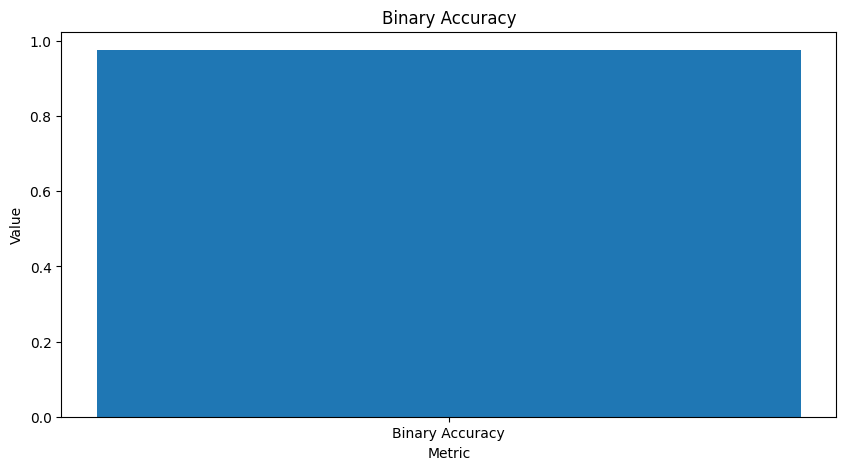

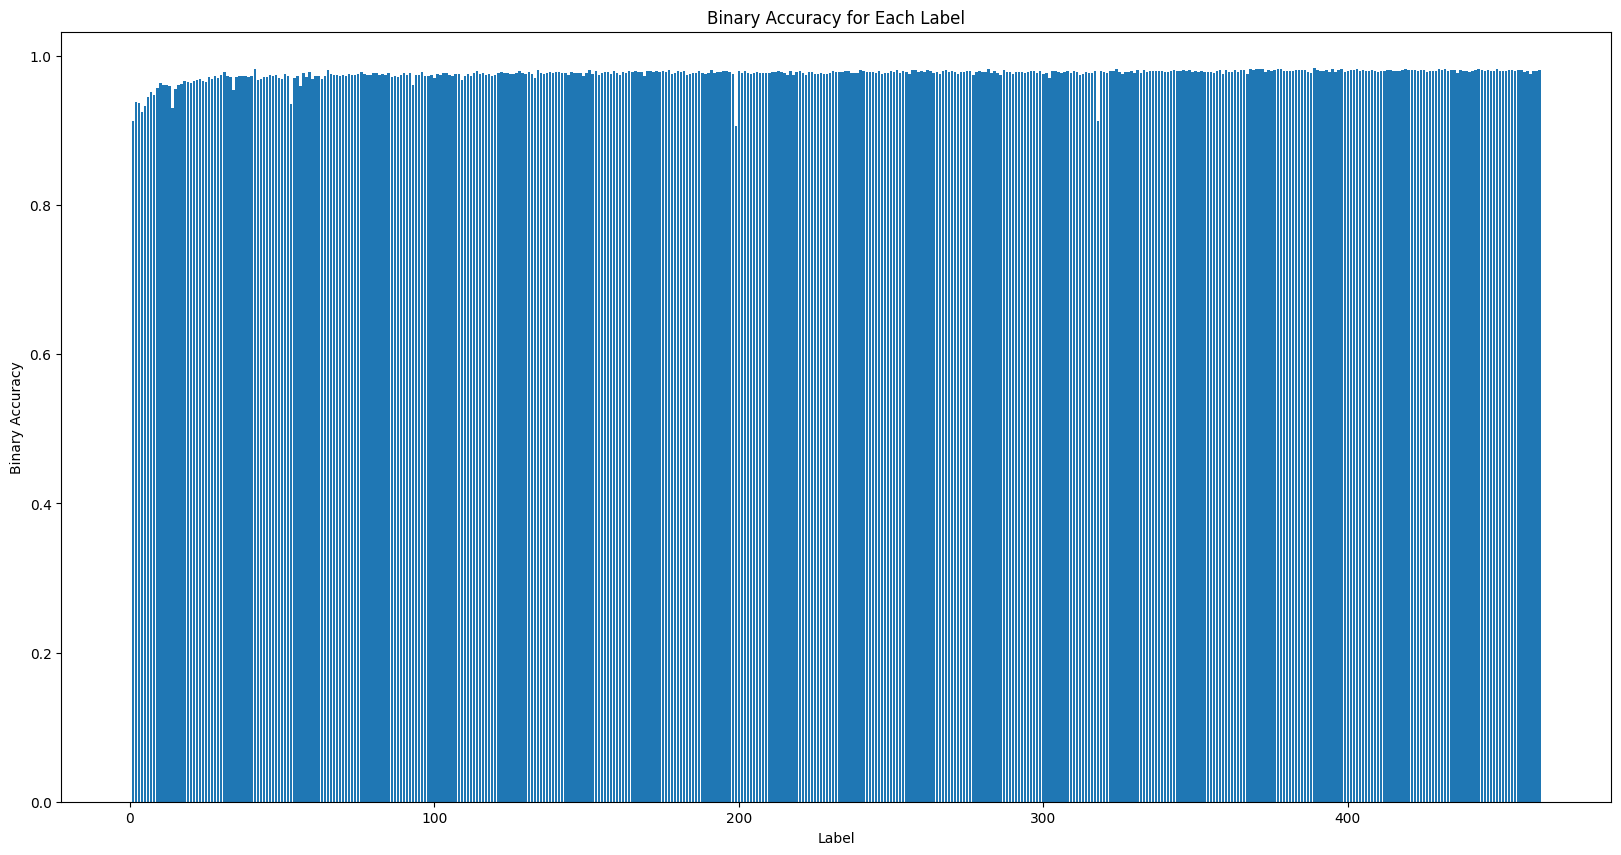

Binary Accuracy: 0.9809705042816366
Binary F1 Score: 0.7549009613863649


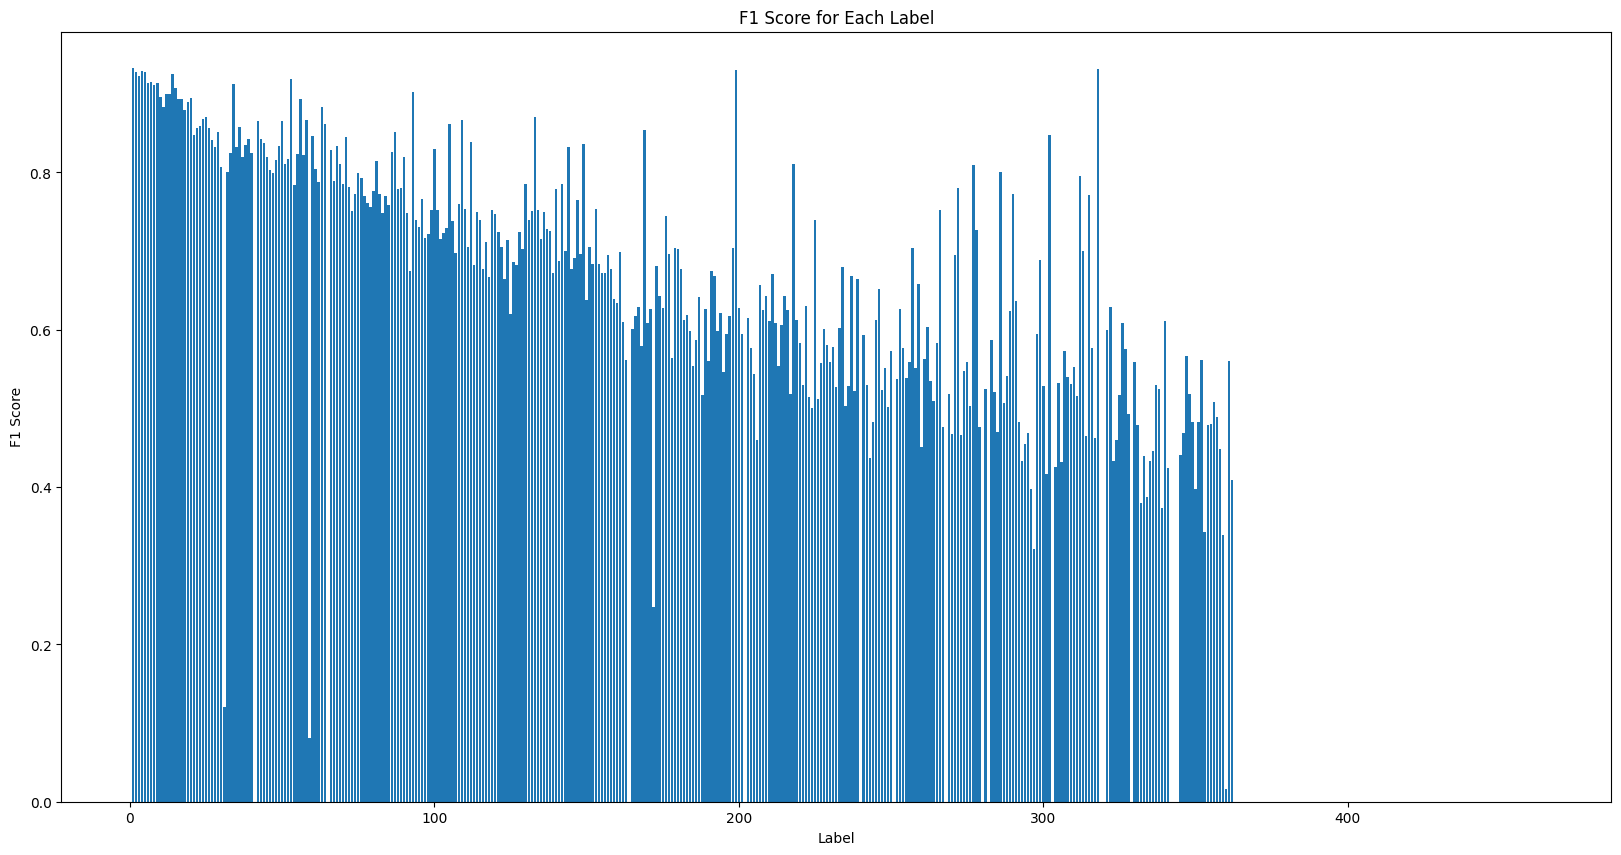

d:\Projects\chatbotsupportcostume\backend\.venv\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) [0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 13, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 15, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 16, 160, 161, 162, 164, 165, 166, 167, 168, 169, 17, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 2, 20, 200, 202, 203, 204, 205, 206, 207, 208, 209, 21, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 23, 230, 231, 232, 233, 234, 235, 236, 237, 238, 24, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 25, 251, 252, 253, 254, 255, 256, 257, 258, 259, 26, 260, 261

Confusion matrix for label 0:
[[3986    0]
 [8626    0]]


Confusion matrix for label 1:
[[7046    0]
 [5566    0]]


Confusion matrix for label 2:
[[10510     0]
 [ 2102     0]]


Confusion matrix for label 3:
[[12098     0]
 [  514     0]]


Confusion matrix for label 4:
[[12149     0]
 [  463     0]]


Confusion matrix for label 5:
[[12197     0]
 [  415     0]]


Confusion matrix for label 6:
[[12183     0]
 [  429     0]]


Confusion matrix for label 7:
[[11506     0]
 [ 1106     0]]


Confusion matrix for label 8:
[[12090     0]
 [  522     0]]


Confusion matrix for label 9:
[[12217     0]
 [  395     0]]


Confusion matrix for label 10:
[[12073     0]
 [  539     0]]


Confusion matrix for label 11:
[[11142     0]
 [ 1470     0]]


Confusion matrix for label 12:
[[12018     0]
 [  594     0]]


Confusion matrix for label 13:
[[10080     0]
 [ 2532     0]]


Confusion matrix for label 14:
[[12189     0]
 [  423     0]]


Confusion matrix for label 15:
[[11644     0]
 [  968     

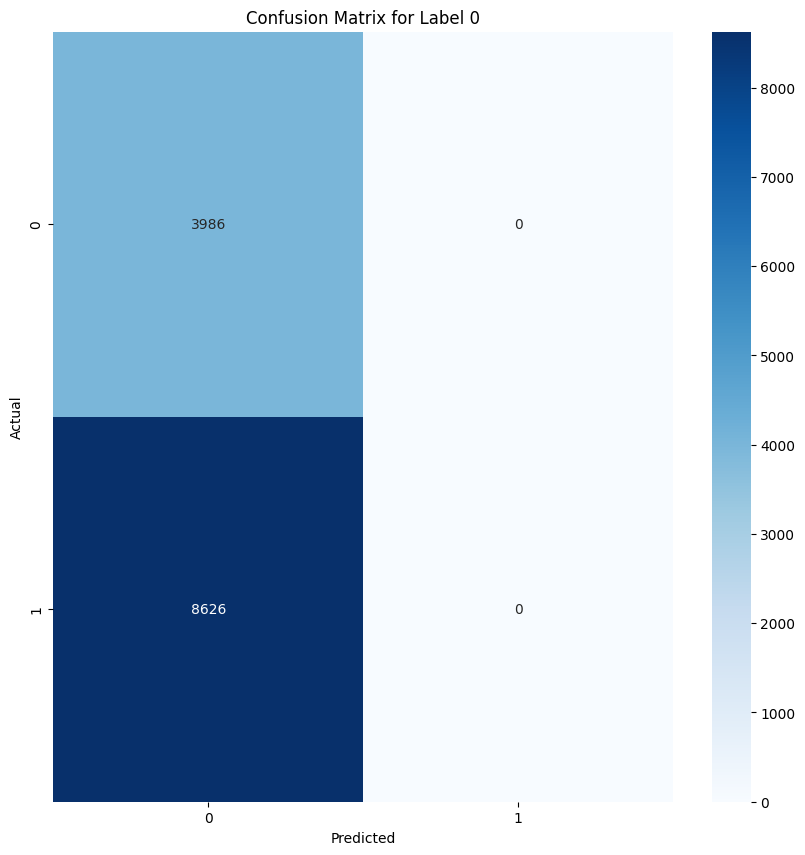

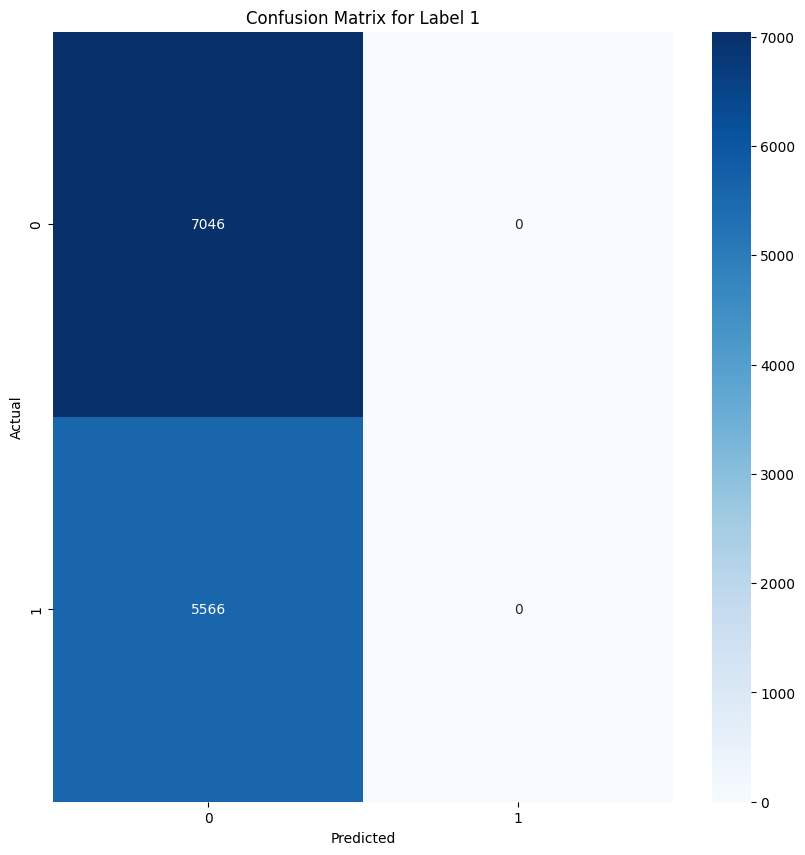

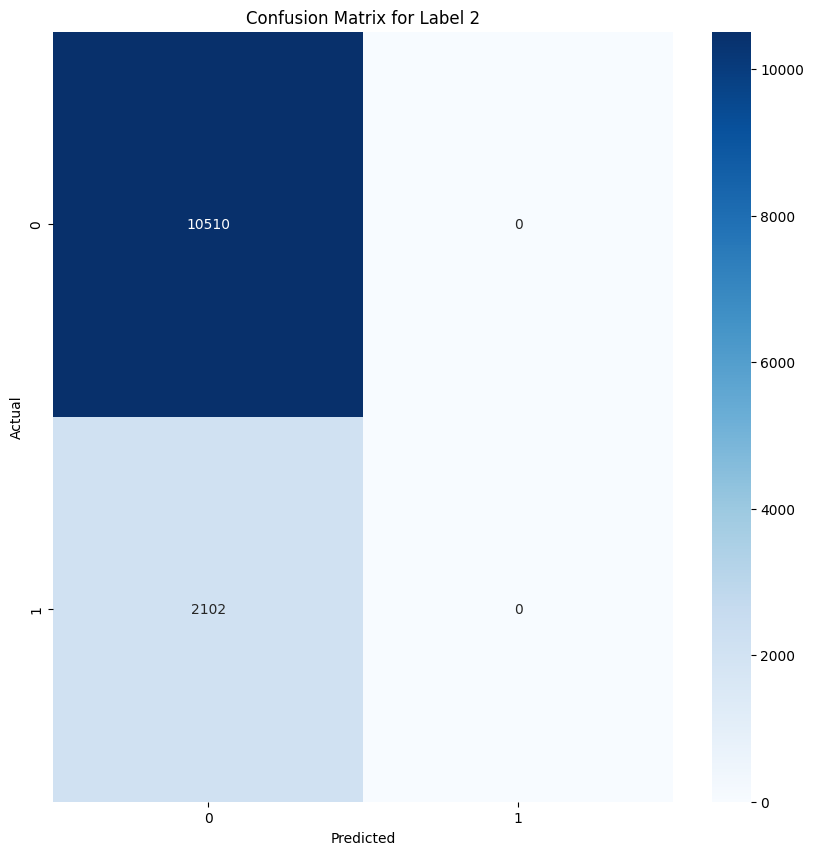

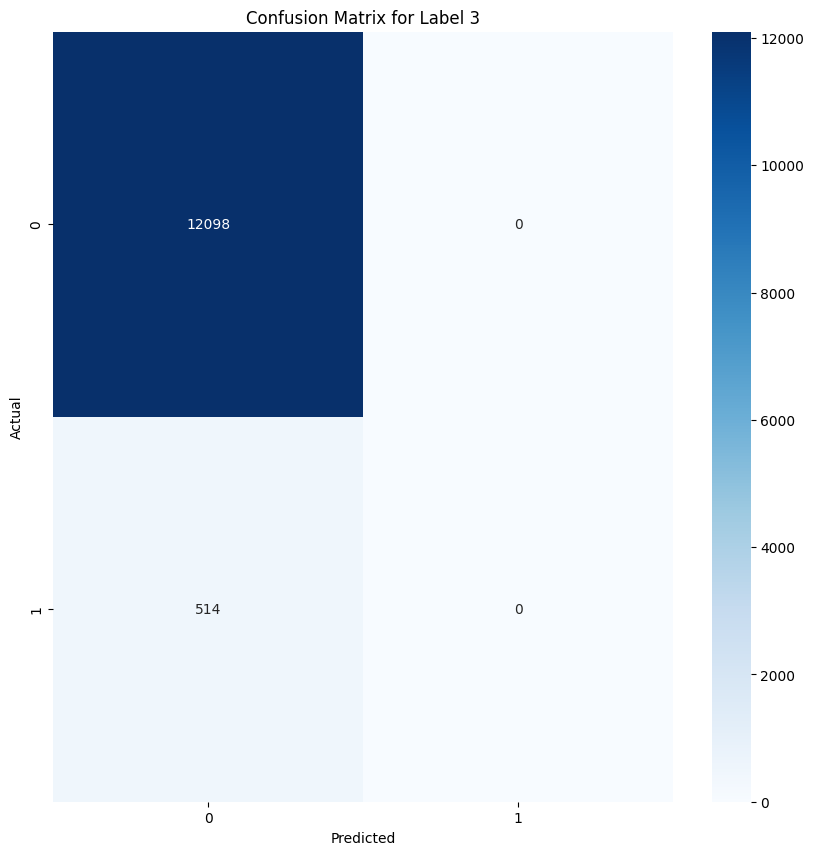

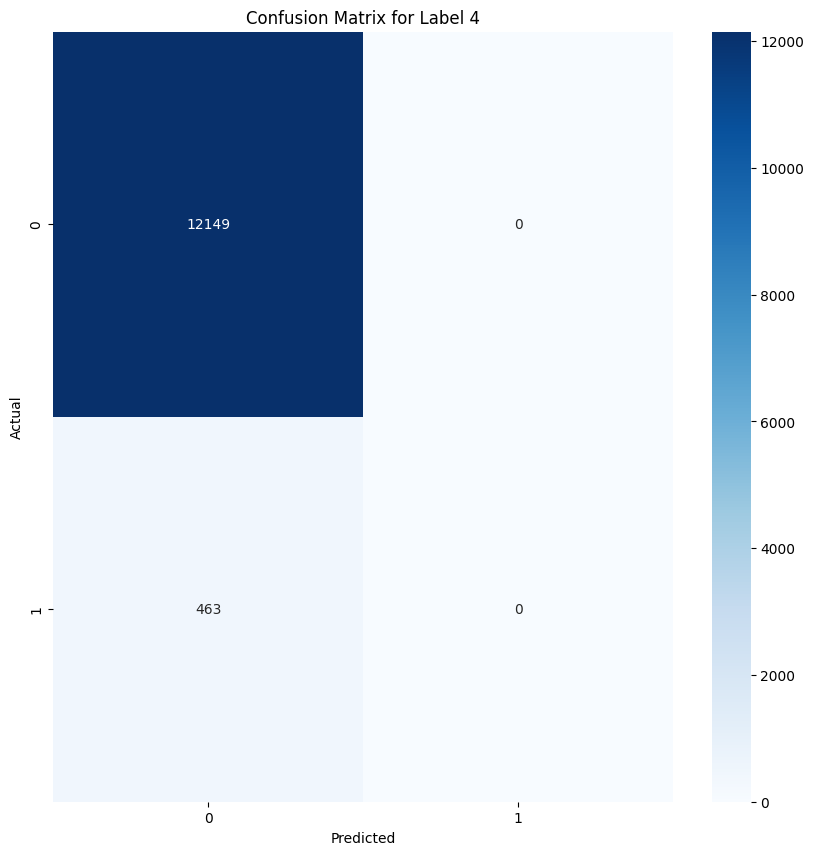

In [4]:
import random

from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


actual_one_hot = []
predict_one_hot = []

actual_attrs = []
predict_attrs = []
# read file attribute.txt
with open('attribute.txt', 'r') as f:
    index_line = 0
    for line in f:
        index_line += 1
        # print('line: ', index_line)
        attrs = line.split()
        actual_attrs.append(attrs)
        # create a list of 463 attributes
        one_hot = [0] * 463
        #convert  integer to one hot encoding
        for attr in attrs:
            index = int(attr)
            one_hot[index] = 1

        actual_one_hot.append(one_hot)
        # print(one_hot)

        # while True:
        new_one_hot = [0] * 463
        rate_list = [1]*86 + [0]*14
        for i in range(463):
            choice = random.choice(rate_list)
            if choice == 1:
                new_one_hot[i] = one_hot[i]
            else:
                new_one_hot[i] = 0 if random.choice(rate_list) == 1 else 1
    
            # actual = np.array(one_hot)
            # predict = np.array(new_one_hot)
            # binary_f1_score = f1_score(actual.flatten(), actual.flatten(), average='binary')
            # print('binary_f1_score: ', binary_f1_score)
            # if binary_f1_score > 0.5:
            # break

        predict_one_hot.append(new_one_hot)

        # convert from one hot to integer
        new_attrs = []
        for i in range(463):
            if one_hot[i] == 1:
                new_attrs.append(i)

        predict_attrs.append(new_attrs)

    # Convert lists to numpy arrays
    actual_one_hot = np.array(actual_one_hot)
    predict_one_hot = np.array(predict_one_hot)

    # Calculate binary accuracy
    binary_accuracy = accuracy_score(actual_one_hot.flatten(), predict_one_hot.flatten())

    # Plot binary accuracy
    plt.figure(figsize=(10, 5))
    plt.bar(['Binary Accuracy'], [binary_accuracy])
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.title('Binary Accuracy')
    plt.show()
   
   
    # Initialize list to store binary accuracy for each label
    binary_accuracy_per_label = []

    # Calculate binary accuracy for each label
    for i in range(actual_one_hot.shape[1]):
        binary_accuracy = accuracy_score(actual_one_hot[:, i], predict_one_hot[:, i])
        binary_accuracy_per_label.append(binary_accuracy)

    # Plot binary accuracy for each label
    plt.figure(figsize=(20, 10))
    plt.bar(range(1, len(binary_accuracy_per_label) + 1), binary_accuracy_per_label)
    plt.xlabel('Label')
    plt.ylabel('Binary Accuracy')
    plt.title('Binary Accuracy for Each Label')
    plt.show()

    
    # from sklearn.metrics import confusion_matrix

    # # Initialize counters
    # TP = [0] * 463
    # FP = [0] * 463
    # TN = [0] * 463
    # FN = [0] * 463

    # # Calculate confusion matrix for each attribute
    # for i in range(463):
    #     cm = confusion_matrix(actual_one_hot[:, i], predict_one_hot[:, i])
    #     TN[i], FP[i], FN[i], TP[i] = cm.ravel()

    # # Print results
    # for i in range(463):
    #     print(f"For attribute {i+1}:")
    #     print(f"True Positives: {TP[i]}")
    #     print(f"False Positives: {FP[i]}")
    #     print(f"True Negatives: {TN[i]}")
    #     print(f"False Negatives: {FN[i]}")
    #     print("\n")

    from sklearn.metrics import f1_score

    # Calculate binary F1 score
    binary_f1_score = f1_score(actual_one_hot.flatten(), predict_one_hot.flatten(), average='binary')

    # Print binary accuracy and F1 score
    print(f"Binary Accuracy: {binary_accuracy}")
    print(f"Binary F1 Score: {binary_f1_score}")


    from sklearn.metrics import f1_score

    # Initialize list to store F1 score for each label
    f1_score_per_label = []

    # Calculate F1 score for each label
    for i in range(actual_one_hot.shape[1]):
        f1 = f1_score(actual_one_hot[:, i], predict_one_hot[:, i])
        f1_score_per_label.append(f1)

    # Plot F1 score for each label
    plt.figure(figsize=(20, 10))
    plt.bar(range(1, len(f1_score_per_label) + 1), f1_score_per_label)
    plt.xlabel('Label')
    plt.ylabel('F1 Score')
    plt.title('F1 Score for Each Label')
    plt.show()

    from sklearn.preprocessing import MultiLabelBinarizer
    from sklearn.metrics import multilabel_confusion_matrix
    import seaborn as sns

    # Initialize MultiLabelBinarizer
    mlb = MultiLabelBinarizer()

    # Transform actual_attrs and predict_attrs to binary format
    actual_attrs_binary = mlb.fit_transform(actual_attrs)
    predict_attrs_binary = mlb.transform(predict_attrs)

    # Calculate confusion matrix
    cm = multilabel_confusion_matrix(actual_attrs_binary, predict_attrs_binary)

    # Print confusion matrix
    for i, matrix in enumerate(cm):
        print(f"Confusion matrix for label {i}:")
        print(matrix)
        print("\n")

    # cm is the multilabel confusion matrix
    head = 5
    for i, matrix in enumerate(cm):
        if i == head:
            break
        plt.figure(figsize=(10, 10))
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for Label {i}')
        plt.show()